In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [39]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visual exploration

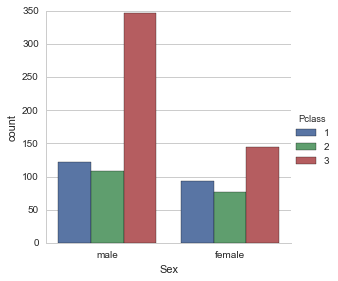

In [64]:
sns.factorplot('Sex', data=titanic_df, hue='Pclass', kind='count')

We can see that they were a lot of males in the thirds class

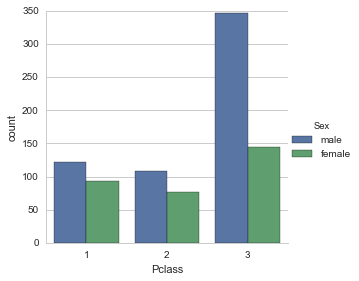

In [65]:
sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count')

When comparing per class we can observe that they were more men in any class 

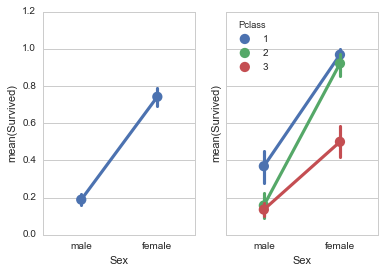

In [69]:
#How did survival rate compare between men and women
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.pointplot(x="Sex", y="Survived", data=titanic_df, ax=ax1);
sns.pointplot(x="Sex", y="Survived", hue='Pclass',data=titanic_df, ax=ax2);

Comparing to the average survival rate of 0.486592, females are in a much better position, what about kids (people below the age 16)?

In [71]:
titanic_df['person_status']= np.where((titanic_df['Age'] <16), 'Child', 'Adult')

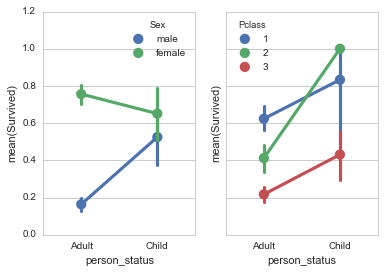

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.pointplot(x="person_status", y="Survived", hue='Sex',data=titanic_df, ax=ax1);
sns.pointplot(x="person_status", y="Survived", hue='Pclass',data=titanic_df, ax=ax2);

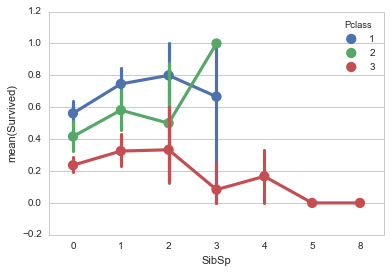

In [41]:
sns.pointplot(x="SibSp", y="Survived", hue="Pclass", data=titanic_df);

In [42]:
titanic_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

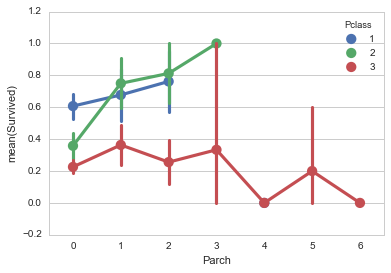

In [44]:
sns.pointplot(x="Parch", y="Survived", hue="Pclass", data=titanic_df);

In [52]:
#Where people came from 
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
#Replace NaN value with S

In [59]:
titanic_df.Embarked.fillna(value='S', inplace=True);

In [60]:
sns.pointplot(x="Embarked", y="Survived", hue="Pclass", data=titanic_dfE

SyntaxError: unexpected EOF while parsing (<ipython-input-60-2f83df248339>, line 1)

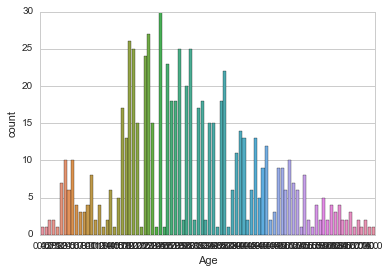

In [28]:
sns.countplot(x='Age', data=titanic_df)